## Import Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import datetime
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
plt.style.use('fivethirtyeight')

In [2]:
df =pd.read_csv("../input/fifa-data-eda/data-1.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.sample(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
15983,15983,245846,Y. Oyanedel,17,https://cdn.sofifa.org/players/4/19/245846.png,Chile,https://cdn.sofifa.org/flags/55.png,58,78,Universidad Católica,...,59.0,51.0,53.0,51.0,14.0,7.0,7.0,14.0,14.0,€528K
12411,12411,232793,T. Kanai,28,https://cdn.sofifa.org/players/4/19/232793.png,Japan,https://cdn.sofifa.org/flags/163.png,63,63,Nagoya Grampus,...,47.0,63.0,65.0,61.0,15.0,13.0,11.0,14.0,6.0,€363K
6917,6917,238666,A. Nandzik,25,https://cdn.sofifa.org/players/4/19/238666.png,Germany,https://cdn.sofifa.org/flags/21.png,68,71,SSV Jahn Regensburg,...,61.0,65.0,64.0,64.0,9.0,11.0,6.0,14.0,10.0,€1.5M
1660,1660,230189,Silas Almeim,26,https://cdn.sofifa.org/players/4/19/230189.png,Brazil,https://cdn.sofifa.org/flags/54.png,75,75,Vitória,...,68.0,73.0,73.0,77.0,15.0,14.0,15.0,9.0,11.0,€10.5M
2840,2840,170597,T. Krul,30,https://cdn.sofifa.org/players/4/19/170597.png,Netherlands,https://cdn.sofifa.org/flags/34.png,73,73,Norwich City,...,53.0,14.0,17.0,14.0,74.0,72.0,68.0,68.0,74.0,€4.9M


In [5]:
df.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## DATA CLEANING

In [9]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.dtypes

ID                  int64
Name               object
Age                 int64
Photo              object
Nationality        object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 88, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

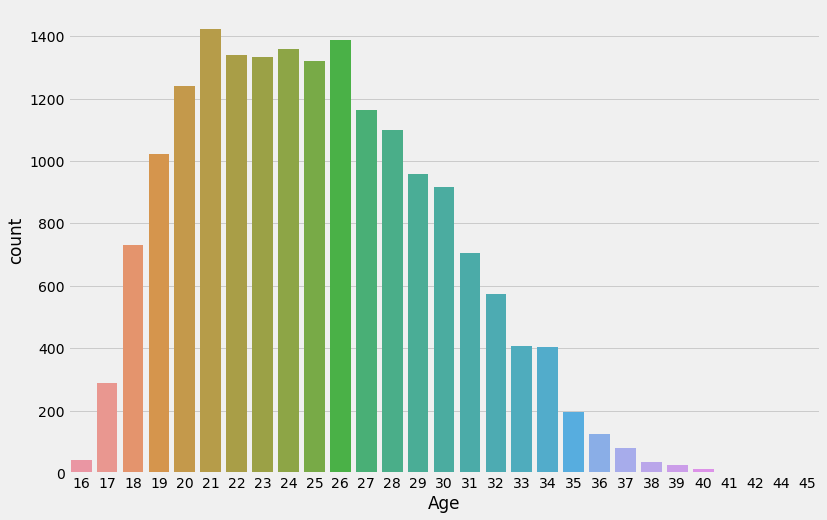

In [12]:
plt.figure(figsize=(12,8))
sns.countplot('Age',data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Overall', ylabel='count'>

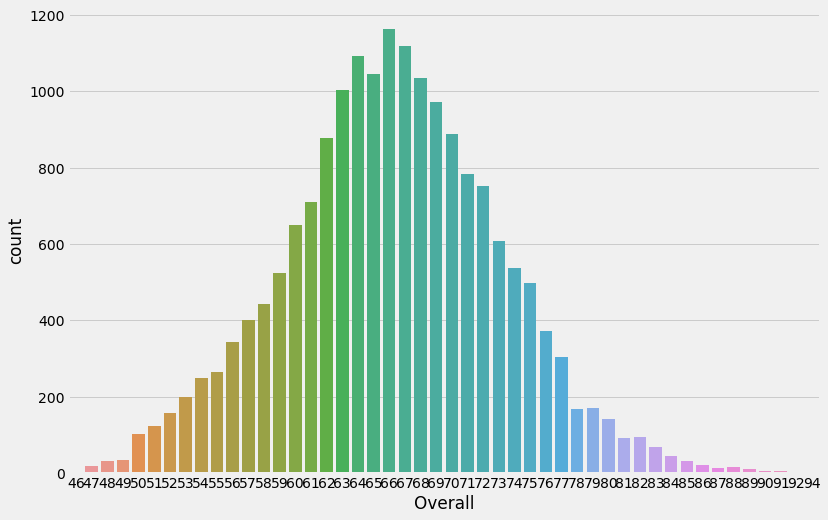

In [13]:
plt.figure(figsize=(12,8))
sns.countplot('Overall',data=df)

In [14]:
df.corr()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,-0.131994,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,0.130545,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,0.394972,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,0.246319,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,0.866417,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,0.191770,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,0.307925,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,0.741035,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,-0.076585,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255
Crossing,-0.131994,0.130545,0.394972,0.246319,0.866417,0.191770,0.307925,0.741035,-0.076585,1.000000,...,0.645805,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539


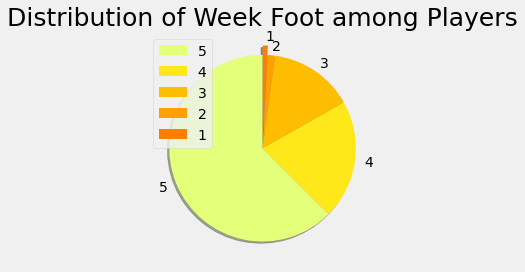

In [15]:

labels = ['5', '4', '3', '2', '1'] 
size = df['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()

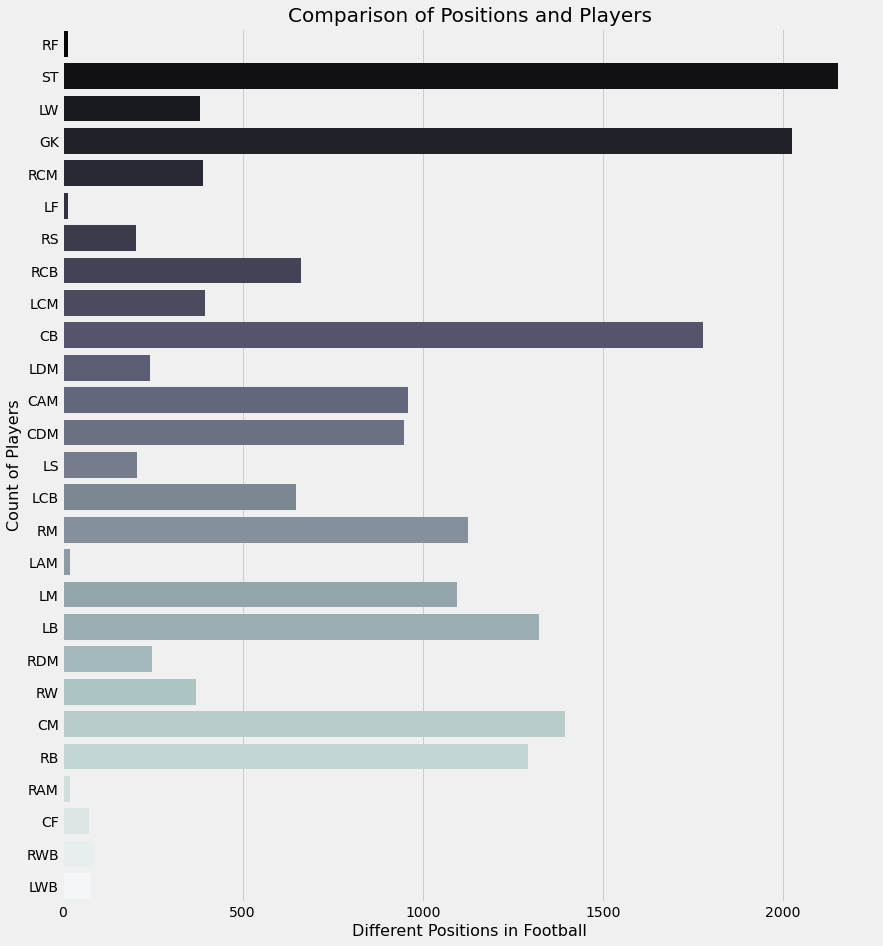

In [16]:
plt.figure(figsize = (13, 15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y = 'Position', data = df, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


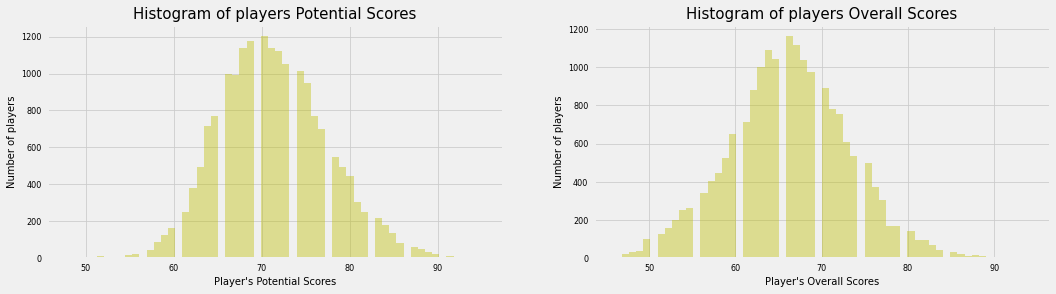

In [17]:
plt.figure(figsize=(16, 4))
plt.style.use('seaborn-paper')

plt.subplot(1, 2, 1)
x = df.Potential
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 15)

plt.subplot(1, 2, 2)
y = df.Overall
ax = sns.distplot(y, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 15)
plt.show()

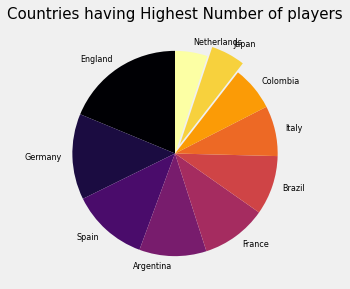

In [18]:
df['Nationality'].value_counts().head(10).plot(kind = 'pie', cmap = 'inferno',
                                        startangle = 90, explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0])
plt.title('Countries having Highest Number of players', fontsize = 15)
plt.axis('off')
plt.show()

In [19]:
# best players per each position with their age, club, and nationality based on their overall scores
df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club',
                             'Nationality','Overall']].sort_values(by = 'Overall',
                                        ascending = False).style.background_gradient(cmap = 'pink')

,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


In [20]:
# Top 10 Right footed footballers

df[df['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
                    'Nationality', 'Overall']].sort_values(by = 'Overall',
                            ascending = False).head(10).style.background_gradient(cmap = 'copper')

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90


In [21]:
# finding 5 youngest Players from the dataset

youngest = df[df['Age'] == 16][['Name', 'Age', 'Club', 'Nationality', 'Overall']]
youngest.sort_values(by = 'Overall', ascending = False).head().style.background_gradient(cmap = 'magma')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62
